# Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

In [4]:
train=pd.read_csv("train_preprocessed.csv")
test=pd.read_csv("test_preprocessed.csv")


In [11]:
SampleSubmission=pd.read_csv("sample_submission_V9Inaty.csv")

In [5]:
train

,Stay_In_Current_City_Years_4,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Gender,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_processed,User_ID,Purchase,Product_ID
0,0,0,0,1,0,-1.745599,0.294486,-1.372156,-0.833232,-0.610134,-1.086589,-0.614983,-2.357741,1000001,8370.0,P00069042
1,0,0,0,1,0,-1.745599,0.294486,-1.372156,-0.833232,-1.125843,-0.121369,1.624131,-2.357741,1000001,15200.0,P00248942
2,0,0,0,1,0,-1.745599,0.294486,-1.372156,-0.833232,1.710556,-1.086589,-0.614983,-2.357741,1000001,1422.0,P00087842
3,0,0,0,1,0,-1.745599,0.294486,-1.372156,-0.833232,1.710556,1.165591,-0.614983,-2.357741,1000001,1057.0,P00085442
4,1,0,0,0,0,0.572869,1.214421,1.259845,-0.833232,0.679138,-1.086589,-0.614983,1.983673,1000002,7969.0,P00285442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,0,0,1,0,0,0.572869,0.754454,-0.056155,1.200146,3.773391,-1.086589,-0.614983,1.709479,1006033,368.0,P00372445
550064,0,0,0,0,1,-1.745599,-1.085416,1.259845,-0.833232,3.773391,-1.086589,-0.614983,-0.346981,1006035,371.0,P00375436
550065,1,0,0,0,0,-1.745599,1.061099,-0.056155,1.200146,3.773391,-1.086589,-0.614983,-0.346981,1006036,137.0,P00375436
550066,0,0,0,1,0,-1.745599,-1.085416,1.259845,-0.833232,3.773391,-1.086589,-0.614983,1.983673,1006038,365.0,P00375436


In [6]:
test

,Stay_In_Current_City_Years_4,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Gender,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_processed,User_ID,Product_ID
0,0,0,0,1,0,0.572869,-0.165481,-0.056155,1.200146,-1.125843,0.682981,-0.614983,1.252488,1000004,P00128942
1,0,1,0,0,0,0.572869,1.367744,1.259845,-0.833232,-0.610134,-0.282239,-0.614983,-0.346981,1000009,P00113442
2,1,0,0,0,0,-1.745599,-1.085416,-0.056155,1.200146,-0.094425,1.165591,-0.614983,0.567001,1000010,P00288442
3,1,0,0,0,0,-1.745599,-1.085416,-0.056155,1.200146,-0.352280,0.361241,-0.614983,0.567001,1000010,P00145342
4,0,0,1,0,0,-1.745599,-1.085416,1.259845,-0.833232,-0.352280,-0.282239,1.304258,-0.346981,1000011,P00053842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1,0,0,0,0,-1.745599,1.061099,-0.056155,1.200146,0.679138,-1.086589,-0.614983,-0.346981,1006036,P00118942
233595,1,0,0,0,0,-1.745599,1.061099,-0.056155,1.200146,-0.094425,0.200371,-0.614983,-0.346981,1006036,P00254642
233596,1,0,0,0,0,-1.745599,1.061099,-0.056155,1.200146,-1.125843,-0.282239,1.304258,-0.346981,1006036,P00031842
233597,1,0,0,0,0,-1.745599,-1.085416,1.259845,-0.833232,1.194847,1.487331,-0.614983,1.252488,1006037,P00124742


In [19]:
train_X = train.drop(columns=['User_ID','Product_ID','Purchase'])

In [20]:
train_y = train['Purchase']

In [22]:
test_X = test.drop(columns=['User_ID','Product_ID'])

In [37]:
def model_fit(model, train_X, train_y, test_X, SampleSubmission, filename):
    model.fit(train_X, train_y)
    train_pred = np.abs(model.predict(train_X))
   # print("Train RMSE : ",mean_squared_error(np.log1p(train_y), np.log1p(train_pred), squared=False))
    print("Train RMSE : ",mean_squared_error(train_y, train_pred, squared=False))
    test_pred = model.predict(test_X)
    SampleSubmission['Purchase'] = np.abs(test_pred)
    SampleSubmission.to_csv(filename, index = False)
    return mean_squared_error(train_y, train_pred, squared=False)

    

In [38]:
model = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), KNeighborsRegressor()]

In [39]:
for i in model:
    print(i)
    model_fit(i, train_X, train_y, test_X, SampleSubmission, str(i)[:-2]+".csv")

LinearRegression()
Train RMSE :  4624.89346826727
Ridge()
Train RMSE :  4624.89204571483
Lasso()
Train RMSE :  4624.895433649729
ElasticNet()
Train RMSE :  4653.9323786387195
KNeighborsRegressor()
Train RMSE :  2956.2565604019055


<AxesSubplot:ylabel='Frequency'>

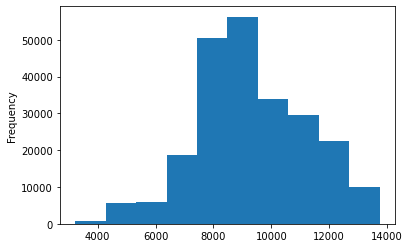

In [43]:
pd.read_csv("LinearRegression.csv")["Purchase"].plot(kind = 'hist')

(<AxesSubplot:ylabel='Frequency'>,)

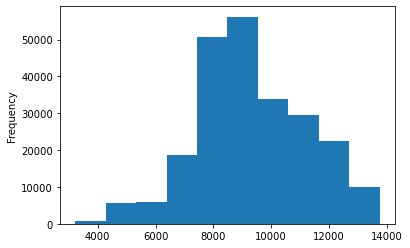

In [44]:
pd.read_csv("Ridge.csv")["Purchase"].plot(kind = 'hist'),


(<AxesSubplot:ylabel='Frequency'>,)

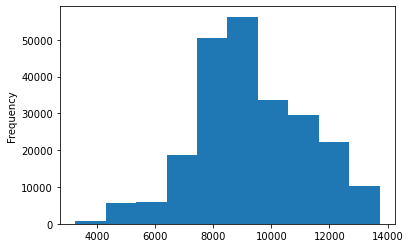

In [45]:
pd.read_csv("Lasso.csv")["Purchase"].plot(kind = 'hist'),


<AxesSubplot:ylabel='Frequency'>

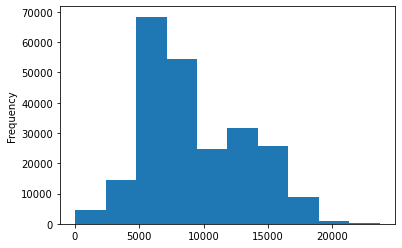

In [46]:
pd.read_csv("KNeighborsRegressor.csv")["Purchase"].plot(kind = 'hist')

In [48]:
'''res = []
for i in range(1,10):
    model = KNeighborsRegressor(n_neighbors=i)
    print(i)
    err = model_fit(model, train_X, train_y, test_X, SampleSubmission, str(i)+"KNN.csv")
    res.append(err)'''

1
Train RMSE :  3231.029161551496
2
Train RMSE :  2901.977214506598
3
Train RMSE :  2878.128418677421
4
Train RMSE :  2910.4860272937976
5
Train RMSE :  2956.2565604019055
6
Train RMSE :  3006.0495283139926
7
Train RMSE :  3054.3895119892923
8
Train RMSE :  3099.5108702061057
9
Train RMSE :  3142.005575657807


In [52]:
def model_fit1(model, train_X, train_y, test_X, SampleSubmission, filename):
    model.fit(train_X, train_y)
    train_pred = np.abs(model.predict(train_X))
    print("Train RMSE : ",mean_squared_error(np.log1p(train_y), np.log1p(train_pred), squared=False))
    test_pred = model.predict(test_X)
    SampleSubmission['Purchase'] = np.expm1(np.abs(test_pred))
    SampleSubmission.to_csv(filename, index = False)
    return mean_squared_error(np.log1p(train_y), np.log1p(train_pred), squared=False)
        


In [54]:
'''res = []
#for i in range(1,5):
model = KNeighborsRegressor(n_neighbors=5)+
print(i)
err = model_fit1(model, train_X, train_y, test_X, SampleSubmission, str(i)+"KNNLOG.csv")
res.append(err)''''''

    

2
Train RMSE :  0.4286542529989954


<ipython-input-52-baa38d5c3621>:6: RuntimeWarning: overflow encountered in expm1
  SampleSubmission['Purchase'] = np.expm1(np.abs(test_pred))
